In [1]:
import numpy as np
import os

In [2]:
S0 = 83.43              # spot stock price
K = 70                 # strike
T = 1.0                 # maturity 
r = 0.92                 # risk free rate 
sig = 35.4               # Annualised volatility
N = 3                   # number of periods or number of time steps  
payoff = "put"          # payoff

In [3]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u                                   # down factor

In [4]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [5]:
S

array([[8.34300000e+01, 6.27363892e+10, 4.71755307e+19, 3.54743193e+28],
       [0.00000000e+00, 1.10949403e-07, 8.34300000e+01, 6.27363892e+10],
       [0.00000000e+00, 0.00000000e+00, 1.47546086e-16, 1.10949403e-07],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.96214192e-25]])

In [6]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

1.807117389625743e-09

In [7]:

S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , 69.99999989],
       [ 0.        ,  0.        ,  0.        , 70.        ]])

In [8]:

# for European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[27.89633288, 37.90798984,  0.        ,  0.        ],
       [ 0.        , 37.90799003, 51.51270993,  0.        ],
       [ 0.        ,  0.        , 51.51271011, 69.99999989],
       [ 0.        ,  0.        ,  0.        , 70.        ]])

In [9]:
print('European ' + payoff, str( V[0,0]))

European put 27.896332875916006


In [12]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [13]:
T = 1
r = 0.92
sigma = 0.2
S0 = 83.43
K = 70

In [14]:
S = mcs_simulation_np(1000)

In [15]:
S = np.transpose(S)
S

array([[ 83.43      ,  83.46119558,  83.82760667, ..., 272.70338873,
        273.08142095, 274.28107404],
       [ 83.43      ,  83.74843918,  82.35654938, ..., 184.67684571,
        184.72187732, 187.35361973],
       [ 83.43      ,  84.33930552,  84.31948878, ..., 159.8442841 ,
        158.87866001, 159.95808764],
       ...,
       [ 83.43      ,  84.48434238,  85.18782729, ..., 193.5516122 ,
        195.61084223, 196.56681293],
       [ 83.43      ,  84.05107665,  84.34379124, ..., 192.31952738,
        191.32558456, 191.89291011],
       [ 83.43      ,  84.36706737,  84.4524256 , ..., 183.40989151,
        182.52082194, 183.00516182]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

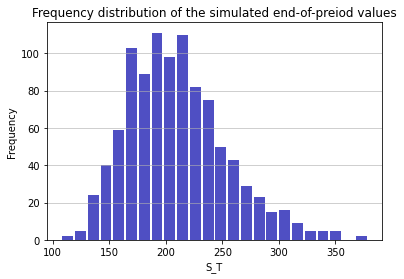

In [16]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [18]:
c = np.mean(np.maximum(S[:,-1] - K,0))
print('European call', str(c))

European call 140.30804501241494
